In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import util



def main(train_path, valid_path, save_path):
    # ******* Train Logistic Regression Model on train set.***********
    x, y = util.load_dataset(train_path, add_intercept=True)
    y = y.reshape(len(x), 1)
    clf = LogisticRegression()
    clf.fit(x, y)
    
    # ********Make predictions on validation set.****
    x, y = util.load_dataset(valid_path, add_intercept=True)
    y = y.reshape(len(x), 1)
    y_valid_probs = clf.predict(x)
    
    # ******** Report Error from the validation set**
    valid_loss = LogisticRegression.calculate_logistic_loss(y, y_valid_probs)
    print("Error", valid_loss, " %")
    
    # *********plot the validation set***************
    theta = clf.theta
    a = np.arange(-2,5)
    b = np.divide(np.subtract(np.negative(theta[0]), np.multiply(theta[1], a)),theta[2])
    plt.scatter(x[:, 1], x[:, 2], c=y)
    plt.plot(a, b, 'r-')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Validation Set')
    plt.show()
    plt.savefig('ps1b.png')
    
    
    np.savetxt(save_path, y_valid_probs)
    
    
    
class LogisticRegression:
   
    def __init__(self, step_size=0.01, max_iter=1000000, eps=1e-20,
                 theta_0=None, verbose=True):
        
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose
        self.m = 0  # num of training examples
        self.n = 0 # num of features

    def sigmoid(self, z):
        return np.divide(1, np.add(1, np.exp(np.negative(z))))
        

    def j_gradient(self, theta, x, y):
        return np.divide(x.T.dot(y - self.sigmoid(np.dot(x, theta))) ,-self.m)
    

    def j_hessian(self, theta, x, y):
        g = self.sigmoid(np.dot(x, theta))
        s = np.diag(np.diag(g.dot((1-g).T)))
        return np.divide(x.T.dot(s).dot(x), self.m)

    def fit(self, x, y):
        """Run newton's method to minimize j(theta) for logistic regression."""
        self.m = len(x)
        self.n = len(x[0])
        oldVal = np.zeros((self.n,1))
        hessinv = np.linalg.inv(self.j_hessian(oldVal, x, y))
        gradient = self.j_gradient(oldVal, x, y)
        newVal = oldVal - np.dot(hessinv, gradient)
        
        delta = self.eps #tolerance for convergance
        change = abs(newVal - oldVal)
        i = 0
        while (change > delta).all() and i < self.max_iter:
            oldVal = newVal
            hessinv = np.linalg.inv(self.j_hessian(oldVal, x, y))
            gradient = self.j_gradient(oldVal, x, y)
            newVal = oldVal - np.dot(hessinv, gradient)
            change = abs(newVal - oldVal)
            i += 1
        self.theta = newVal
    
    @classmethod
    def calculate_logistic_loss(cls, y, h):
        incorrect = 0
        m = len(y)
        for i in range(m):
            y_pred = 0 if h[i][0] <= 0.5 else 1
            if y_pred != y[i]:
                incorrect += 1
        return (incorrect/m)*100


    def predict(self, x):
        """Return predicted probabilities given new inputs x."""
        return self.sigmoid(np.dot(x, self.theta))
    

Error 17.0  %


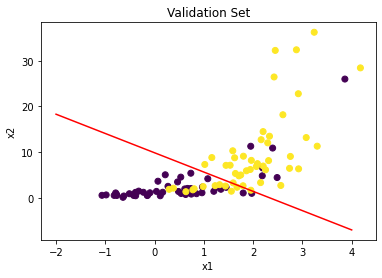

Error 14.000000000000002  %


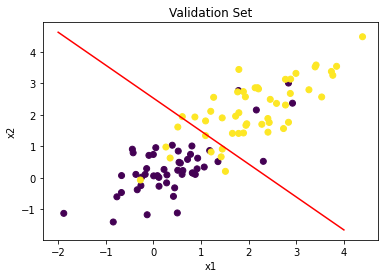

<Figure size 432x288 with 0 Axes>

In [26]:
if __name__ == '__main__':
    main(train_path='ds1_train.csv',
         valid_path='ds1_valid.csv',
         save_path='logreg_pred_1.txt')
    main(train_path='ds2_train.csv',
         valid_path='ds2_valid.csv',
         save_path='logreg_pred_2.txt')
